# Bank authentic

The data consists of 5 columns, where class indicates whether or not a Bank Note was authentic:

- variance of Wavelet Transformed image (continuous)  
- skewness of Wavelet Transformed image (continuous)  
- curtosis of Wavelet Transformed image (continuous)  
- entropy of image (continuous)  
- class (integer): [Target] indicates whether or not a Bank Note was authentic.


### Get the Data

In [31]:
import pandas as pd

In [32]:
data = pd.read_csv("bank_note_data.csv")

In [33]:
data.head(4)

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0
3,3.4566,9.5228,-4.0112,-3.59440,0


In [34]:
data.columns

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy', 'Class'], dtype='object')

### EDA

In [24]:
import seaborn as sns
%matplotlib inline

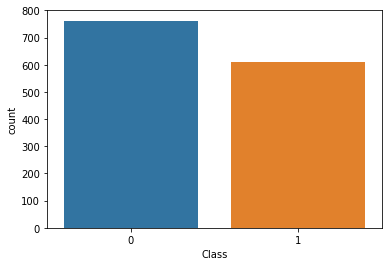

In [25]:
sns.countplot(x='Class', data=data)

LinAlgError: singular matrix

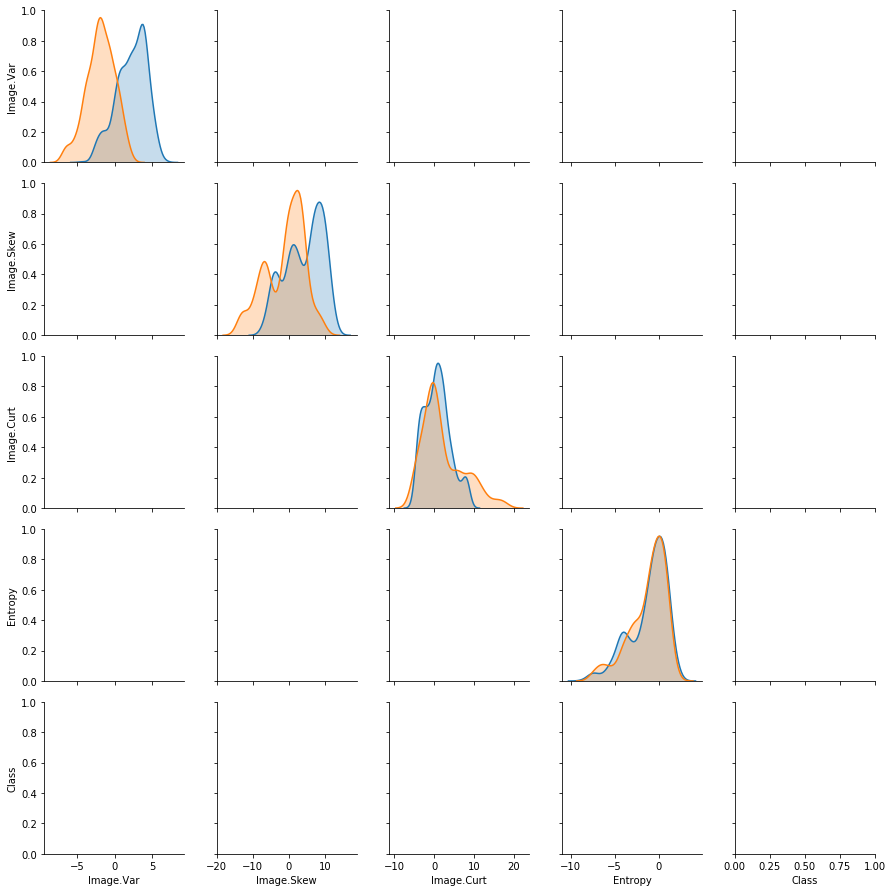

In [26]:
sns.pairplot(data, hue='Class')

### Data Preparation

When using Neural Network and Deep Learning based systems, it is usually a good idea to __Standardize your data__, this step isn't actually necessary for our particular data set, but let's run through it for practice!

#### Standard Scaling:

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
# Create StandarScaler:
scaler = StandardScaler()

In [37]:
# Fit scaler to features.
scaler.fit(data.drop('Class', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
# Transform the features to a scaled version.
scaler_features = scaler.fit_transform(data.drop('Class', axis=1))

In [39]:
type(scaler_features)

numpy.ndarray

- fit() just calculates the parameters (e.g. μ and σ in case of StandardScaler) and saves them as an internal objects state. Afterwards, you can call its transform() method to apply the transformation to a particular set of examples.

In [41]:
# Convert the scaled features to a dataframe, and check the head to make sure the scaling worked.
df_feat = pd.DataFrame(scaler_features, columns=data.columns[:-1])
df_feat.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


#### Train test split

In [42]:
X = df_feat

In [43]:
y = data['Class']

In [44]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

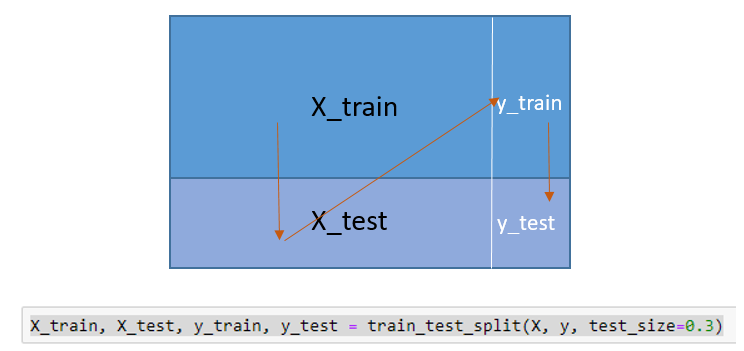

In [57]:
from IPython.display import Image
Image(filename='../../Image/split.png')

### Tensorflow

In [46]:
import tensorflow as tf

- Create list of feature column:

In [47]:
df_feat.columns

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy'], dtype='object')

In [48]:
image_var = tf.feature_column.numeric_column('Image.Var')
image_skew = tf.feature_column.numeric_column('Image.Skew')
image_curt = tf.feature_column.numeric_column('Image.Curt')
entropy = tf.feature_column.numeric_column('Entropy')

In [49]:
type(image_var)

tensorflow.python.feature_column.feature_column_v2.NumericColumn

In [50]:
feat_cols = [image_var, image_skew, image_curt, entropy]

- Classifier selection:

In [51]:
classifier = tf.estimator.DNNClassifier(hidden_units=[10, 20, 10], n_classes=2, feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001FD302506A0>, '_master': '', '_eval_distribute': None, '_train_distribute': None, '_device_fn': None, '_num_worker_replicas': 1, '_service': None, '_keep_checkpoint_max': 5, '_evaluation_master': '', '_num_ps_replicas': 0, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_protocol': None, '_model_dir': 'C:\\Users\\ZIWEIF~1\\AppData\\Local\\Temp\\tmpe18dk9_u', '_task_id': 0, '_save_checkpoints_steps': None, '_task_type': 'worker', '_global_id_in_cluster': 0, '_save_summary_steps': 100, '_tf_random_seed': None, '_save_checkpoints_secs': 600, '_experimental_distribute': None, '_is_chief': True}


- Create input function:

In [54]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=20, shuffle=True)

- Train the classifier:

In [59]:
classifier.train(input_fn=input_func, steps=500)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\ZIWEIF~1\AppData\Local\Temp\tmpe18dk9_u\model.ckpt.
INFO:tensorflow:loss = 12.625236, step = 1
INFO:tensorflow:Saving checkpoints for 48 into C:\Users\ZIWEIF~1\AppData\Local\Temp\tmpe18dk9_u\model.ckpt.
INFO:tensorflow:Loss for final step: 0.18725617.


### Model evaluation:

In [60]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=len(X_test), shuffle=False)

In [61]:
note_predictions = list(classifier.predict(input_fn = pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\ZIWEIF~1\AppData\Local\Temp\tmpe18dk9_u\model.ckpt-48
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [64]:
type(classifier.predict(input_fn = pred_fn))

generator

In [62]:
note_predictions[0]

{'class_ids': array([1], dtype=int64),
 'classes': array([b'1'], dtype=object),
 'logistic': array([0.9936129], dtype=float32),
 'logits': array([5.047075], dtype=float32),
 'probabilities': array([0.00638705, 0.99361295], dtype=float32)}

In [67]:
final_preds=[]
for pred in note_predictions:
    final_preds.append(pred['class_ids'][0])

In [72]:
final_preds[:5]

[1, 1, 1, 1, 1]

### Evaluation:

In [73]:
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
print(confusion_matrix(y_test, final_preds))

[[233   8]
 [  3 168]]


In [76]:
print(classification_report(y_test, final_preds))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       241
           1       0.95      0.98      0.97       171

   micro avg       0.97      0.97      0.97       412
   macro avg       0.97      0.97      0.97       412
weighted avg       0.97      0.97      0.97       412



### Optional Comparison:

You should have noticed extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rfc = RandomForestClassifier(n_estimators=200) 
#n_estimators: The number of trees in the forest.

In [79]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [80]:
rfc_preds = rfc.predict(X_test)

In [82]:
type(rfc_preds)

numpy.ndarray

In [81]:
print(classification_report(y_test, rfc_preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       241
           1       0.97      1.00      0.99       171

   micro avg       0.99      0.99      0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [83]:
print(confusion_matrix(y_test, rfc_preds))

[[236   5]
 [  0 171]]


It should have also done very well, possibly perfect! 